In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm


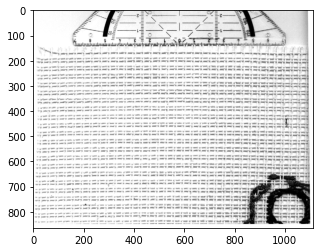

In [3]:
orig_img = cv2.imread('data/textur12.png', 0)
plt.imshow(orig_img, cmap='gray')

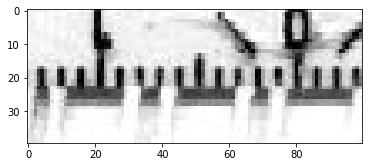

In [4]:
scale_img = orig_img[115:155, 500:600]
plt.imshow(scale_img, cmap='gray')

Text(0.5, 1.0, 'Original image with mm scale')

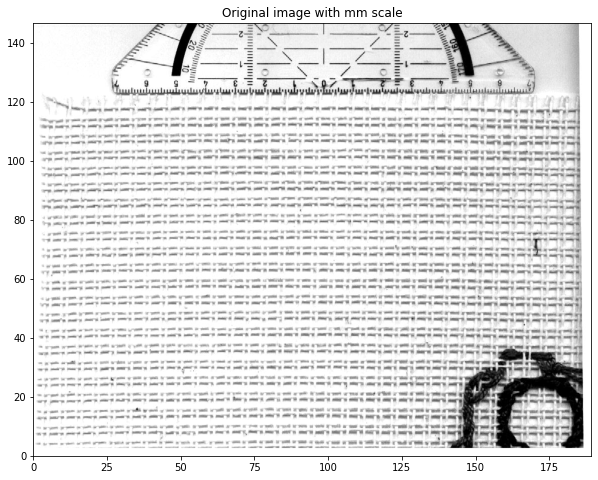

In [5]:
#mm striche zählen -> 17 striche ->17/100mm/px
px_mm = 17/100
x_px = orig_img.shape[1]
y_px = orig_img.shape[0]
x_axis_mm = np.arange(0, x_px)*px_mm
y_axis_mm = np.arange(0, y_px)*px_mm
fig= plt.figure(figsize=(10, 10))
plt.imshow(orig_img, cmap='gray', extent=[x_axis_mm.min(), x_axis_mm.max(),  y_axis_mm.min(), y_axis_mm.max()])
plt.title('Original image with mm scale')

Text(0.5, 1.0, 'structure crop with mm scale')

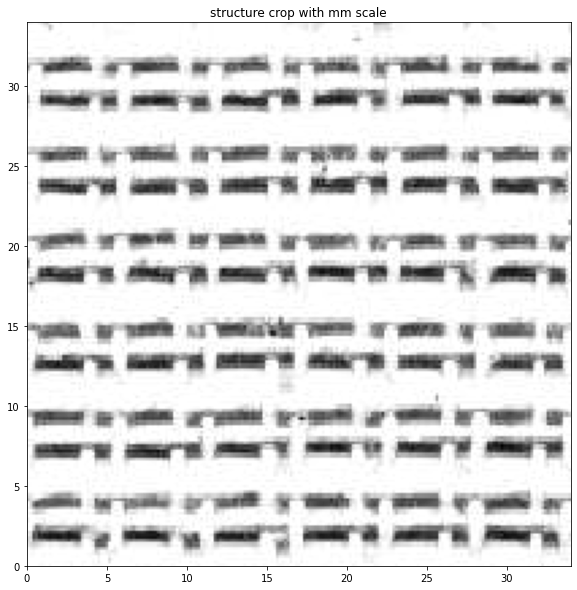

In [6]:
structure = orig_img[400:601, 400:601]
x_px = structure.shape[1]
y_px = structure.shape[0]
x_axis_mm = np.arange(0, x_px)*px_mm
y_axis_mm = np.arange(0, y_px)*px_mm
fig= plt.figure(figsize=(10, 10))
plt.imshow(structure, cmap='gray', extent=[x_axis_mm.min(), x_axis_mm.max(),  y_axis_mm.min(), y_axis_mm.max()])
plt.title('structure crop with mm scale')

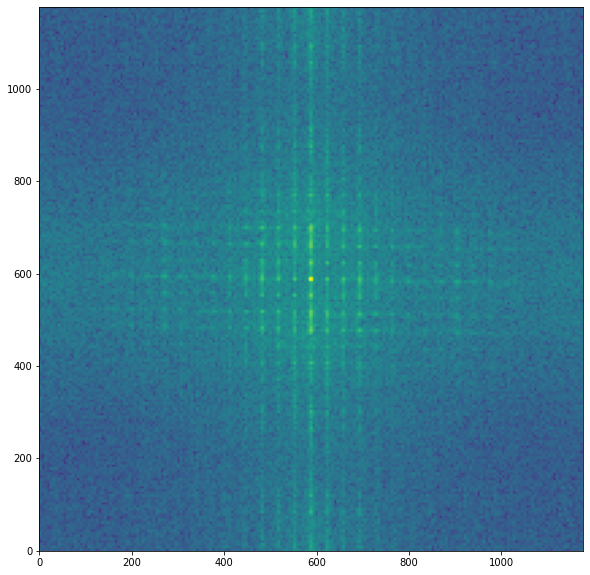

In [7]:
structure_fft = np.fft.fftshift(np.fft.fft2(structure))
u = 1/px_mm
x_frq = structure.shape[1]
y_frq = structure.shape[0]
x_axis_frq = np.arange(0, x_frq)*u
y_axis_frq = np.arange(0, x_frq)*u
fig = plt.figure(figsize=(10, 10))
plt.imshow(np.abs(structure_fft ), norm=LogNorm(vmin=5), extent=[x_axis_frq.min(), x_axis_frq.max(),  y_axis_frq.min(), y_axis_frq.max()])

In [8]:
angle = np.angle(structure_fft)
angle_deg = angle * 180 / np.pi
# fig = plt.figure(figsize=(10, 10))
# plt.imshow(angle, cmap='gray')

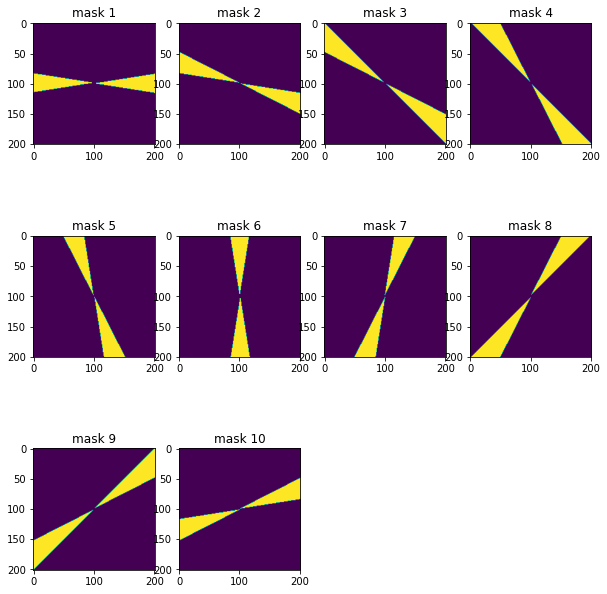

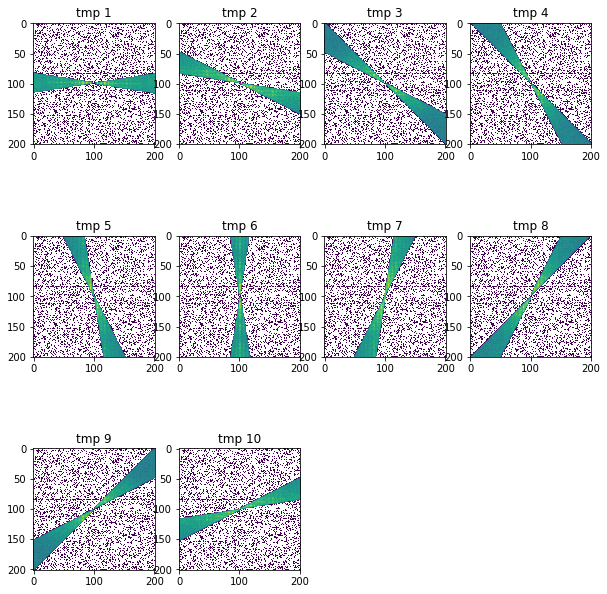

In [19]:
bins = 10
delta_phi = np.pi/bins
shift = delta_phi/2
histo = []
#x = -angle.shape[0]/2 : 1 : angle.shape[0]/2
start = -angle.shape[0]/2
stop = angle.shape[0]/2
x = np.arange(start = start, stop = stop, step = 1)
X, Y = np.meshgrid(x, x)
fig = plt.figure(figsize=(10, 15))
fig2 = plt.figure(figsize=(10, 15))
masks = []
nrows= int(np.sqrt(bins)+1)

for i in range(bins):
    ax = fig.add_subplot(nrows, nrows, i+1)
    ax2 = fig2.add_subplot(nrows, nrows, i+1)
    phi = np.arctan2(Y, X)
    mask = np.zeros(shape=(phi.shape[0], phi.shape[1]))
    mask = (phi > (i*delta_phi-shift)) & (phi < (i*delta_phi+shift))
    mask = np.rot90(mask, k=2) | mask
    masks.append(mask)
    ax.imshow(mask)
    ax.set_title(f"mask {i+1}")
    tmp = mask*structure_fft
    
    ax2.imshow(abs(tmp), norm=LogNorm(vmin=5))
    ax2.set_title(f"tmp {i+1}")
    sum = np.sum(np.real(tmp))
    histo.append(sum)
    #mask = phi > (i*delta_phi-shift) and phi < (i*delta_phi+shift)

bin_cat = np.arange(0, 180, 180/bins)


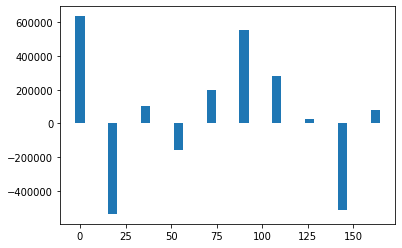

In [23]:


fig3 = plt.bar(bin_cat, histo, width=5)


Aufgabe 2

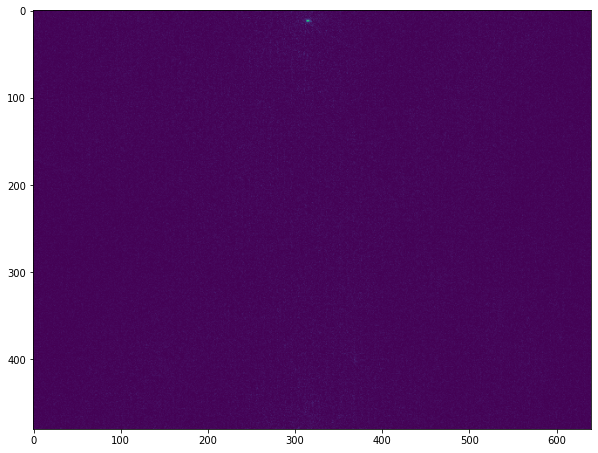

In [21]:
im1 = cv2.imread("data/Uhr_SA2013_05_1{.jpg")
im2 = cv2.imread("data/Uhr_SA2013_05_1w.jpg")
im3 = cv2.imread("data/Uhr_SA2013_05_1x.jpg")

#Compute the DFTs ˆf and ˆg of f and g.
fft1 = np.fft.fft2(im1[:,:,2])
fft2 = np.fft.fft2(im2[:,:,2])
fft3 = np.fft.fft2(im3[:,:,2])
#Multiply ˆf and ˆg and then divide the result by its modulus (pointwise).
#Call the result xi.
t12 = fft1*np.conj(fft2)
xi12 = t12/abs(t12) #ich glaube das ist mit devide by its modulus gemeint
#Apply the inverse Fourier transform to c to obtain an image “approximating”
#delta -x. Apply reflection???. 
cor12 = np.abs(np.fft.ifft2(xi12))
fig = plt.figure(figsize=(10, 10))
plt.imshow(cor12 )

max = np.argmax(cor12, axis=None)